### Libraries

In [1]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import DateTime as dtm
import warnings


### Import Data

In [2]:
df = pd.read_csv("data/clean_sharks_export.csv")

In [3]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [4]:
# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [5]:
#Create subset for Brazil data
df_BR = df.loc[df['Country'] == 'Brazil']

In [6]:
df_BR['Year']

6       2018.0
27      2018.0
31      2018.0
44      2018.0
51      2018.0
         ...  
5121    1927.0
5745    1887.0
5776    1884.0
5847    1878.0
6099    1826.0
Name: Year, Length: 112, dtype: float64

In [7]:
# Count Yearly Occurences 
df_BR['Year_counts'] = df_BR['Year'].apply(lambda x: (df_BR['Year'] == x).sum())

C:\Users\danid\AppData\Local\Temp\ipykernel_13336\674439166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BR['Year_counts'] = df_BR['Year'].apply(lambda x: (df_BR['Year'] == x).sum())


In [8]:
df_BR['Year_counts']

6       5
27      5
31      5
44      5
51      5
       ..
5121    1
5745    1
5776    1
5847    1
6099    1
Name: Year_counts, Length: 112, dtype: int64

In [9]:
df['Year'] = pd.to_datetime(df['Year'])

In [10]:
df_BR["Year_counts"].median()

4.5

In [11]:
#defined angryness factor to be 20% above baseline (median)
criteria = df_BR["Year_counts"].median() * 1.20
criteria

5.3999999999999995

In [12]:
#Extracting data from 1950 onwards for better visualization 
df_BR = df_BR[df_BR['Year'] > 1950]

In [13]:
#finding median & average values to create baseline
df_BR["Year_counts"].median()

5.0

In [14]:
df_BR["Year_counts"].mean()

4.96

## <span style="color:darkslateblue">Q1.: How angry did _Brazilian_ sharks get after the infamous 7 X 1? </span>


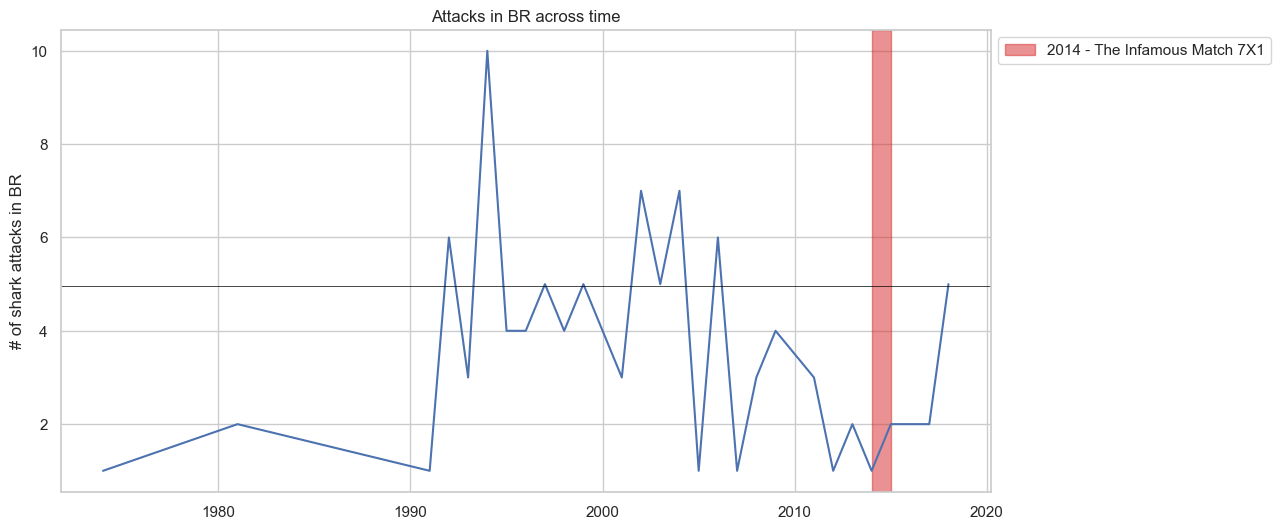

<Figure size 1200x600 with 0 Axes>

In [15]:
plt.plot(df_BR['Year'], df_BR["Year_counts"])


#adjust labels and title
plt.ylabel('# of shark attacks in BR')
plt.title('Attacks in BR across time')
plt.axvspan(2014,2015, color='tab:red', alpha=0.5, label="2014 - The Infamous Match 7X1")
plt.legend(bbox_to_anchor=(1, 1))


#Identify treshhold (median) to check for success criteria
plt.axhline(y=4.96, xmin=0, xmax=2022, c='black', linewidth=0.5)

#export graph to images folder
fig = plt.figure()
fig.savefig('images/Shark-attacks_BR_WC-2014.png', dpi=200, bbox_inches='tight')

### <span style="color:darkslateblue"> Q1.1: How was this reaction compared to other World Cups? </span>

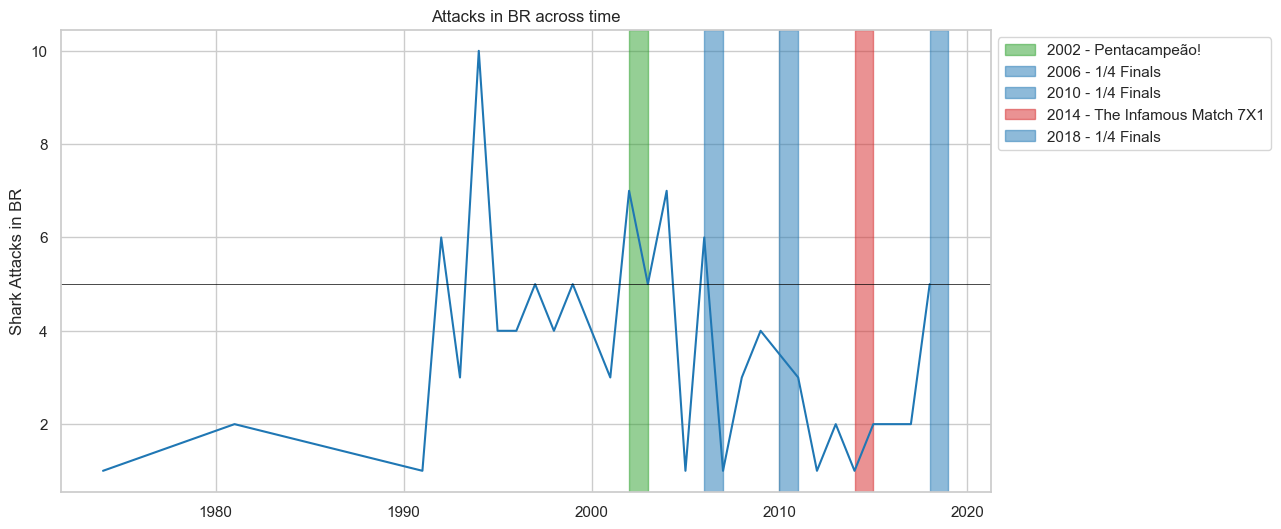

In [16]:

plt.plot(df_BR['Year'], df_BR["Year_counts"], color='tab:blue')



#adjust labels and title
plt.ylabel('Shark Attacks in BR')
plt.title('Attacks in BR across time')
plt.axvspan(2002,2003, color='tab:green', alpha=0.5, label="2002 - Pentacampeão!")
plt.axvspan(2006,2007, color='tab:blue', alpha=0.5, label="2006 - 1/4 Finals")
plt.axvspan(2010,2011, color='tab:blue', alpha=0.5, label="2010 - 1/4 Finals")
plt.axvspan(2014,2015, color='tab:red', alpha=0.5, label="2014 - The Infamous Match 7X1")
plt.axvspan(2018,2019, color='tab:blue', alpha=0.5, label="2018 - 1/4 Finals")


plt.legend(bbox_to_anchor=(1, 1))


#Identify baseline (average) 
plt.axhline(y=5, xmin=0, xmax=2022, c='black', linewidth=0.5)



### <span style="color:lightslategrey; line-height:1.5em"> **Conclusion:** </span>

Data shows that _Brazilian_ sharks do not react negatively when Brazil loses in the World Cup at all, with numbers in those periods being in all time lows. 

In fact, the rise of the 'angryness factor' on the years leading to some World Cups (see 2002, 2006, 2010 and 2018) could indicate that _Brazilian_ _sharks_ are are generally against what some believe to be the Bread and Circus politics surrounding the event. Qualitative data (e.g. interview with the sharks), is needed for further analysis on that subject. 


## <span style="color:darkslateblue"> Q2: How angry were the _Brazilian_ sharks that did attack? </span>




In [17]:
# Extract subset data with only WC championship years.
# Ignore Type "Invalid" from Data.     
df_BR2 = df_BR.loc[(df_BR['Year'] == 2002) | (df_BR['Year'] == 2006) | (df_BR['Year'] == 2010) | (df_BR['Year'] == 2014) | (df_BR['Year'] == 2018) & (df_BR['Type'] != "Invalid"), ['Type','Year', "Fatal"]]


Text(2.7, 3.5, '*No provoked attacks registered')

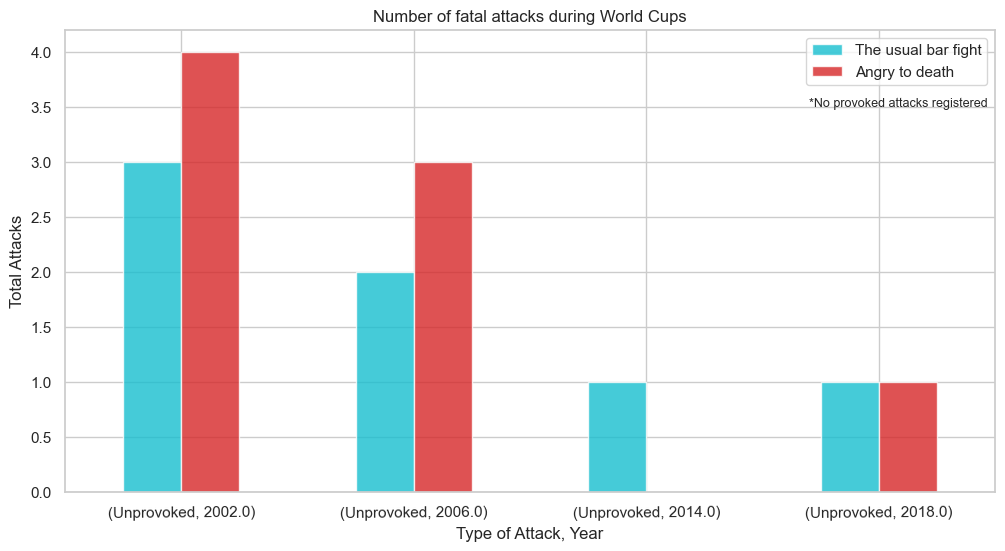

In [18]:
# group subset by Year, Type and Fatality 
#count number of Fatal and Non-Fatal attacks 
#plot result to bar chart. 

df_BR2.groupby(['Type', 'Year', 'Fatal'])['Fatal'].count().unstack().plot(kind='bar', title="Number of fatal attacks during World Cups", color=['tab:cyan', 'tab:red'], alpha=0.8)


#adjust labels and title
legend_labels = ["The usual bar fight", 'Angry to death']
plt.legend(labels=legend_labels)
plt.xticks(rotation=0.5)
plt.ylabel("Total Attacks")
plt.xlabel("Type of Attack, Year")

# place a text box in upper left in axes coords
plt.text(2.7, 3.5, '*No provoked attacks registered',fontsize=9)


### <span style="color:lightslategrey; line-height:1.5em"> **Conclusion:** </span>

Data shows that most fatal attacks happened when Brazil won the worldcup which is leading this researcher to believe that perhaps this is actually how sharks celebrate the world cup. Further research is required to understand sharks customs regarding sports. 


## <span style="color:darkslateblue"> Q3: What was the "Angryness Factor" sharks from countries that made it to the finals? </span>

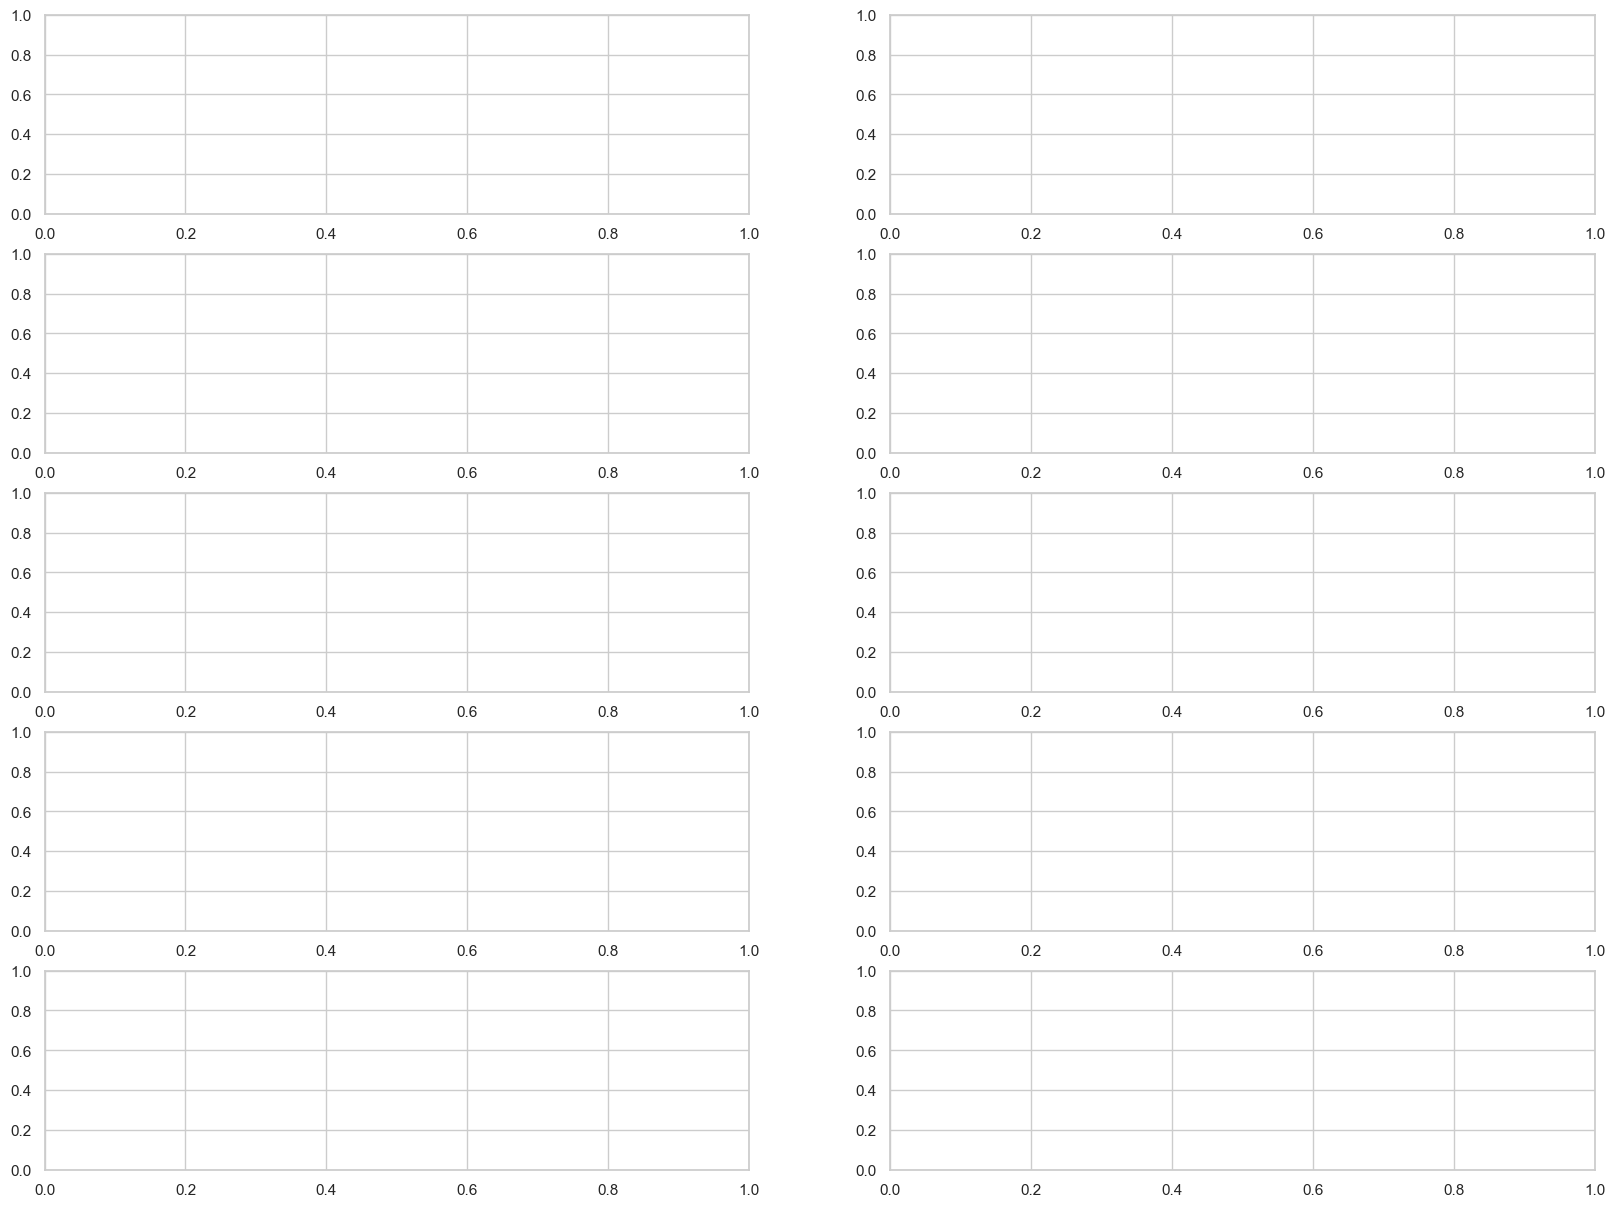

In [19]:
# Create figure and axes [row,column]
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20,15))

In [20]:
warnings.filterwarnings("ignore")

In [21]:
country_ = ['France', 'Croatia', 'Germany', 'Argentina', 'Spain', 'Netherlands', 'Italy', 'France', 'Brazil', 'Germany']
years_ = [2018, 2014, 2010, 2016, 2002]

In [22]:
df_global = df[df['Country'].isin(country_)]
df_global['Country'].value_counts()

Brazil       112
Italy         71
Spain         44
Croatia       34
France        13
Argentina      1
Name: Country, dtype: int64

In [23]:
#df_global.Year = pd.to_datetime(df_global.Year).dt.year
#df_global.Year



In [24]:
df_global.head()

,Unnamed: 0,Case-number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Species,Investigator-or-source,Pdf,Href-formula,Href,Case-number.1,Case-number.2,Original-order,Unnamed:-22,Unnamed:-23
6,6,2018.06.03.a,03-Jun-2018,1970-01-01 00:00:00.000002018,Unprovoked,Brazil,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,...,Tiger shark,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.03.a,2018.06.03.a,6297.0,NaN,NaN
27,27,2018.04.15.c,15-Apr-2018,1970-01-01 00:00:00.000002018,Unprovoked,Brazil,Pernambuco,Piedade,Swimming,Pablo de Melo,...,NaN,"Globo, 4/16/2018",2018.04.15.c-deMelo.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.15.c,2018.04.15.c,6276.0,NaN,NaN
31,31,2018.04.10.R,Reported 10-Apr-2018,1970-01-01 00:00:00.000002018,Invalid,Brazil,Alagoas,"Praia de Sauaçuhy, Maceió",Fishing,Josias Paz,...,Shark involvement not confirmed,"K. McMurray, TrackingSharks.com",2018.04.10.R-Paz.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.10.R,2018.04.10.R,6272.0,NaN,NaN
44,44,2018.02.11,11-Feb-2018,1970-01-01 00:00:00.000002018,Invalid,Brazil,"Boi Island, Victoria",Espirito Santo,Cleaning fish,Rosalida Souza,...,"Injury believed caused by an eel, not a shark",TrackingSharks.com,2018.02.11-Rosilda.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.02.11,2018.02.11,6259.0,NaN,NaN
51,51,2018.01.12,12-Jan-2018,1970-01-01 00:00:00.000002018,Unprovoked,Brazil,Fernando de Noronha,Conceicao Beach,Surfing,Ricardo Ferrari Bulhoes,...,Small shark,TrackingSharks.com,2018.01.12-Bulhoes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.01.12,2018.01.12,6252.0,NaN,NaN


In [25]:
# for each empty plot make one graph to represent a WC Finalist country.

#1. France
sns.countplot(x=df['Year'], hue=df['Country'])


#2. 

In [ ]:
#df_BR2 = df_BR.loc[(df_BR['Year'] == 2002) | (df_BR['Year'] == 2006) | (df_BR['Year'] == 2010) | (df_BR['Year'] == 2014) | (df_BR['Year'] == 2018) & (df_BR['Type'] != "Invalid"), ['Type','Year', "Fatal"]]


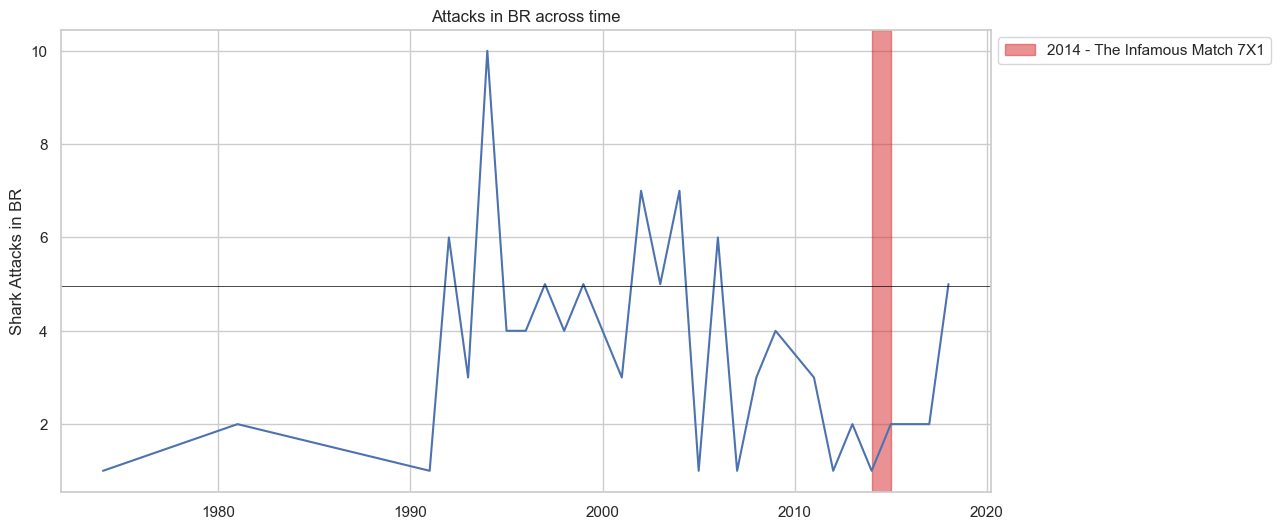

In [ ]:
plt.plot(df_BR['Year'], df_BR["Year_counts"])


#adjust labels and title
plt.ylabel('Shark Attacks in BR')
plt.title('Attacks in BR across time')
plt.axvspan(2014,2015, color='tab:red', alpha=0.5, label="2014 - The Infamous Match 7X1")
plt.legend(bbox_to_anchor=(1, 1))
#Identify treshhold (median) to check for success criteria
plt.axhline(y=4.96, xmin=0, xmax=2022, c='black', linewidth=0.5)

In [ ]:
#df_index = df[["Country", "Year"]].groupby(by=["Country", "Year"]).agg({'Year':'sum'})

#df_index = pd.crosstab(df["Year"], df["Country"]) # count
#pivot_df = pd.crosstab(df.Year,df.Country,values=df.Value,aggfunc='sum')

In [ ]:
#df['Country'].value_counts()

In [ ]:
df['Year'] = pd.to_datetime(df['Year'])
df.Year = pd.to_datetime(df.Year).dt.year
df.head()

,Unnamed: 0,Case-number,Date,Year,Type,Country,Area,Location,Activity,Name,...,Species,Investigator-or-source,Pdf,Href-formula,Href,Case-number.1,Case-number.2,Original-order,Unnamed:-22,Unnamed:-23
0,0,2018.06.25,25-Jun-2018,1970.0,Boating,Usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,1,2018.06.18,18-Jun-2018,1970.0,Unprovoked,Usa,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2,2018.06.09,09-Jun-2018,1970.0,Invalid,Usa,Hawaii,"Habush, Oahu",Surfing,John Denges,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,3,2018.06.08,08-Jun-2018,1970.0,Unprovoked,Australia,New South Wales,Arrawarra Headland,Surfing,male,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,4,2018.06.04,04-Jun-2018,1970.0,Provoked,Mexico,Colima,La Ticla,Free diving,Gustavo Ramos,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [ ]:
pivot_df.head()

NameError: name 'pivot_df' is not defined

In [ ]:
# use crosstab to pivot the dataframe
pivot_df = pd.crosstab(df.Year, df.Country)

# Plot the data for a specific country
plt.plot(pivot_df.index, pivot_df)

# Add labels and title
#plt.xlabel('Year')
#plt.ylabel('Occurrences')
#plt.title('Occurrences by Year for Germany')

# Show the plot
#plt.show()



In [ ]:
df_index.sample(5)